## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [36]:
!pip install scikit-learn==1.0.2

In [2]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [3]:
from sklearn.datasets import load_boston

데이터 로드

In [4]:
data = load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [5]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [6]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [7]:
df['MEDV'] = data['target']

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

train / test 데이터를 분할 합니다.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

<ipython-input-10-5fdc4024a942>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])


In [11]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [12]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70


In [13]:
y_train.head()

92     22.9
98     43.8
253    42.8
329    22.6
166    50.0
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [14]:
import numpy as np

In [15]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [16]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [17]:
my_mse(pred, actual)

4.0

In [18]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [19]:
my_mae(pred, actual)

2.0

In [20]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [21]:
my_rmse(pred, actual)

2.0

### sklearn의 평가지표 활용하기

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [24]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [28]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [29]:
pred = model.predict(x_test)

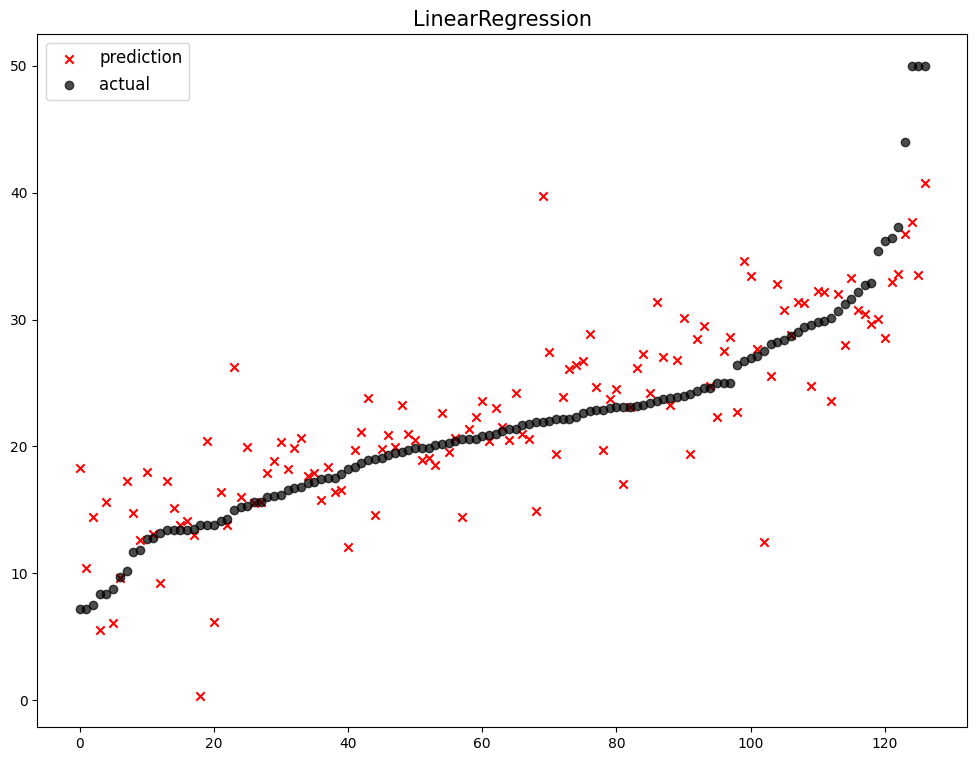

              model        mse
0  LinearRegression  23.658372


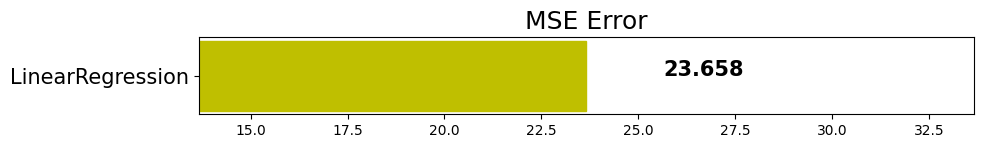

In [30]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다.
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다.
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [44]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [52]:
from sklearn.linear_model import Lasso

In [53]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

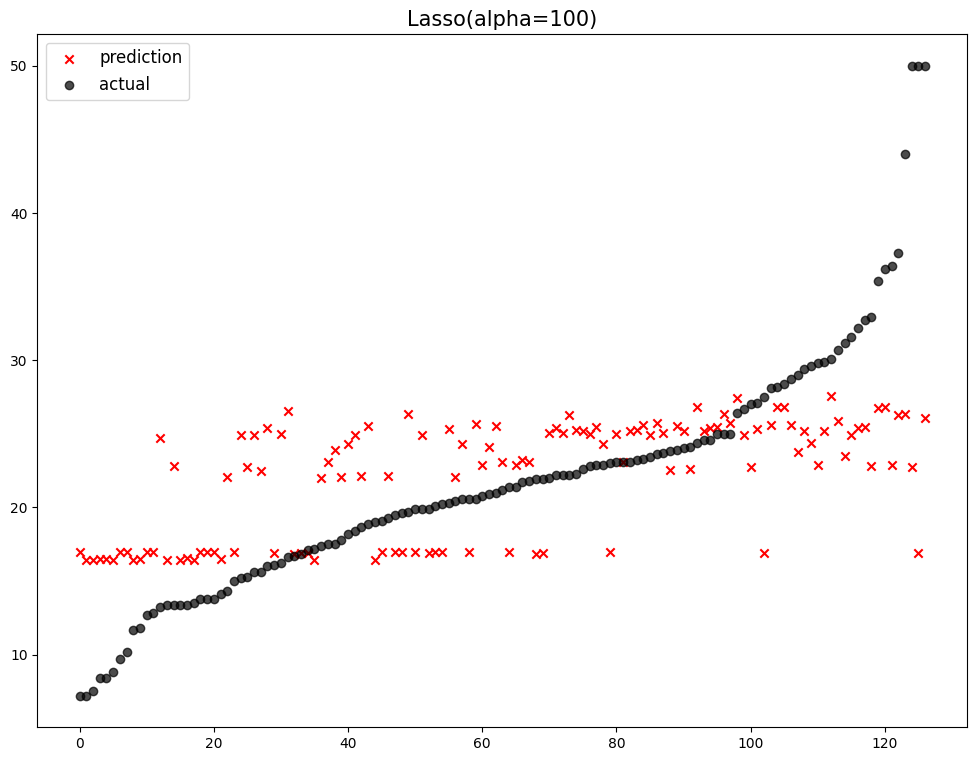

              model        mse
0  Lasso(alpha=100)  47.982772
1  LinearRegression  23.658372


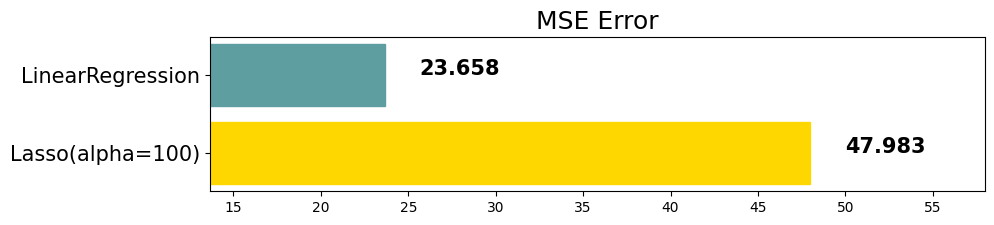

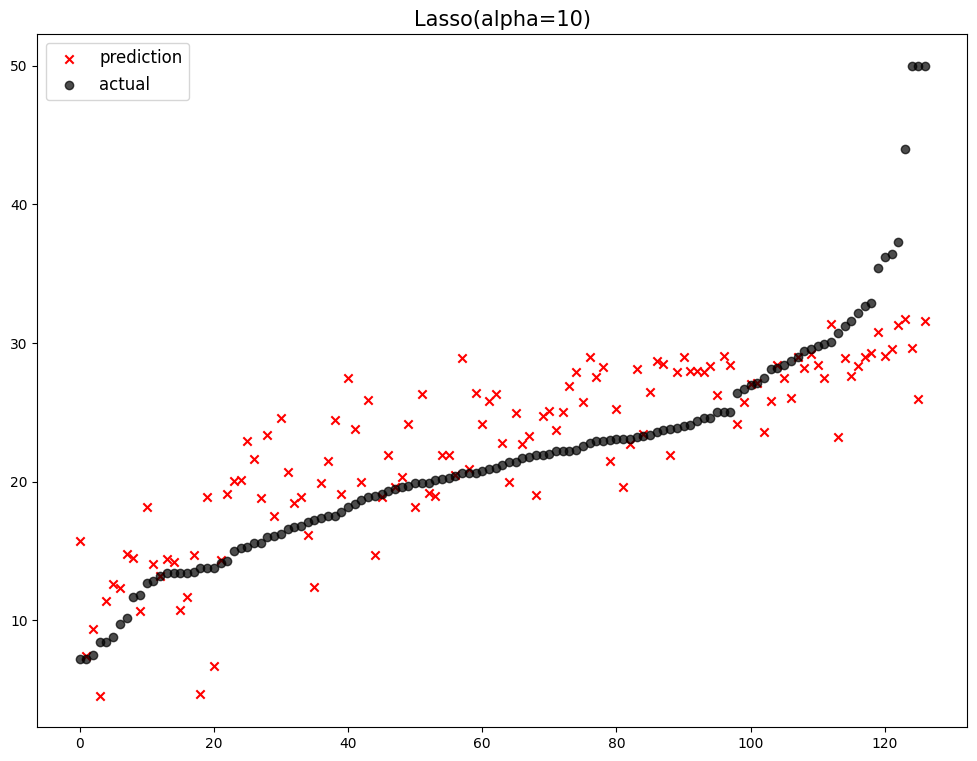

              model        mse
0  Lasso(alpha=100)  47.982772
1   Lasso(alpha=10)  27.183237
2  LinearRegression  23.658372


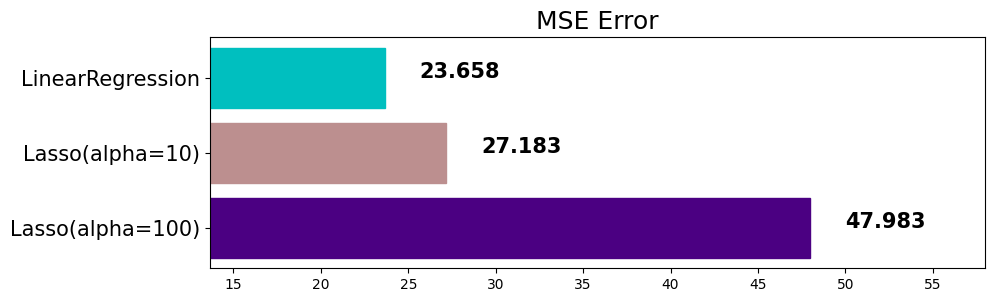

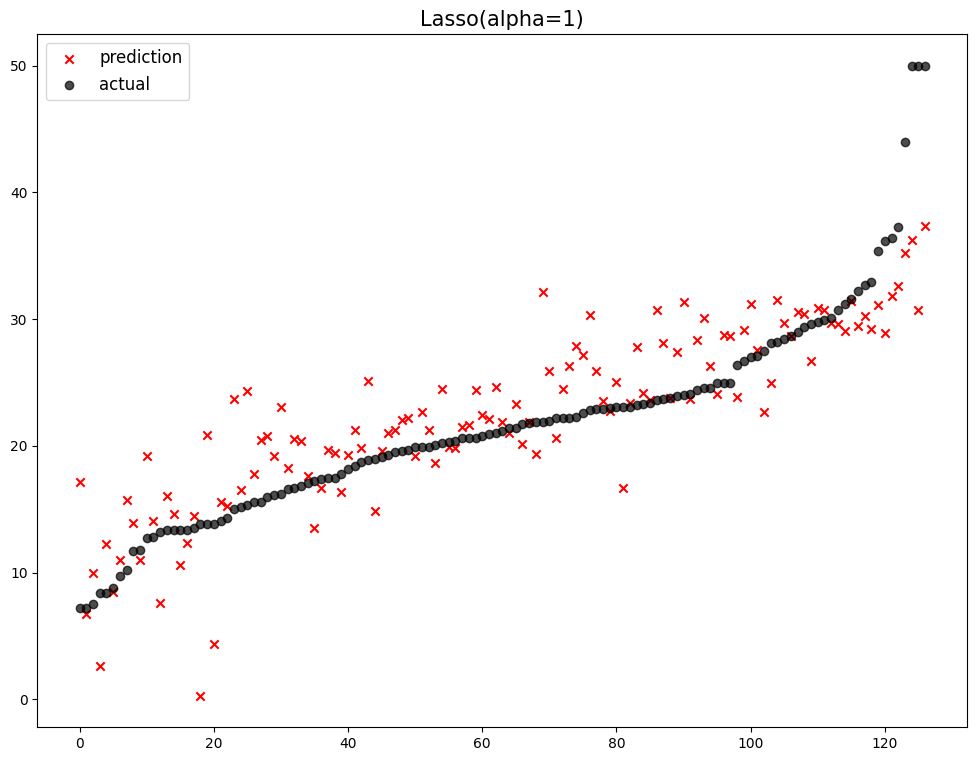

              model        mse
0  Lasso(alpha=100)  47.982772
1   Lasso(alpha=10)  27.183237
2  LinearRegression  23.658372
3    Lasso(alpha=1)  21.065893


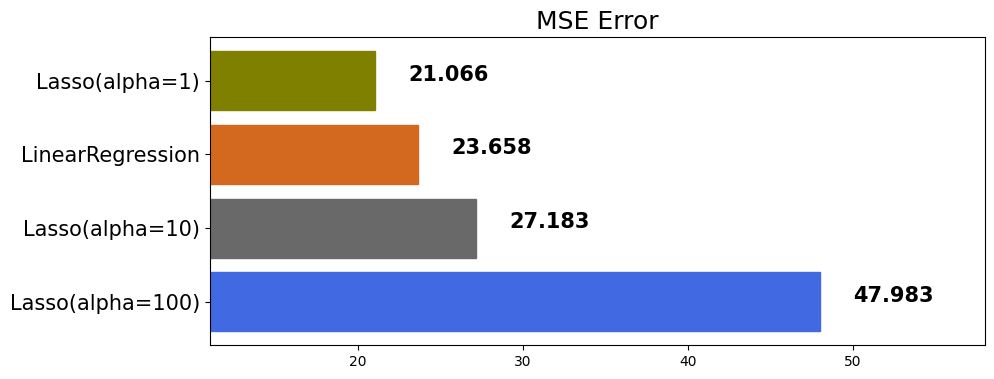

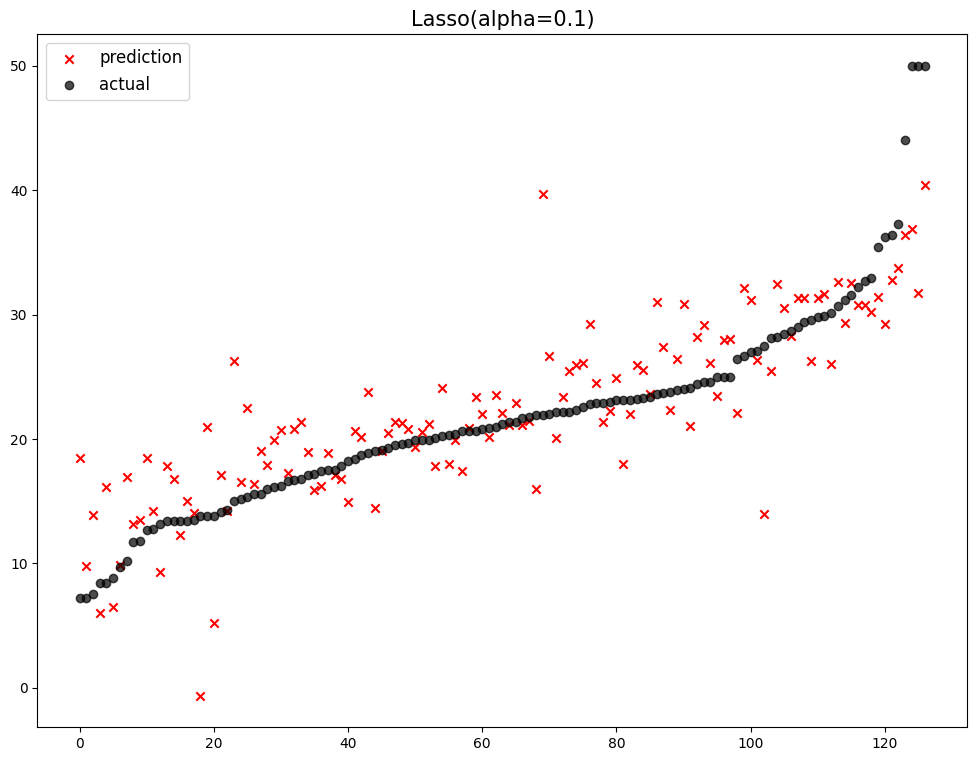

              model        mse
0  Lasso(alpha=100)  47.982772
1   Lasso(alpha=10)  27.183237
2  LinearRegression  23.658372
3  Lasso(alpha=0.1)  22.973392
4    Lasso(alpha=1)  21.065893


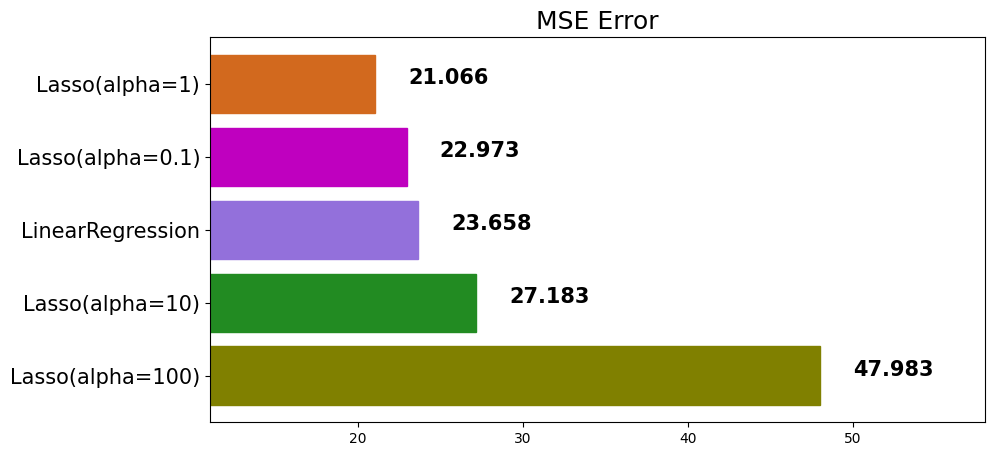

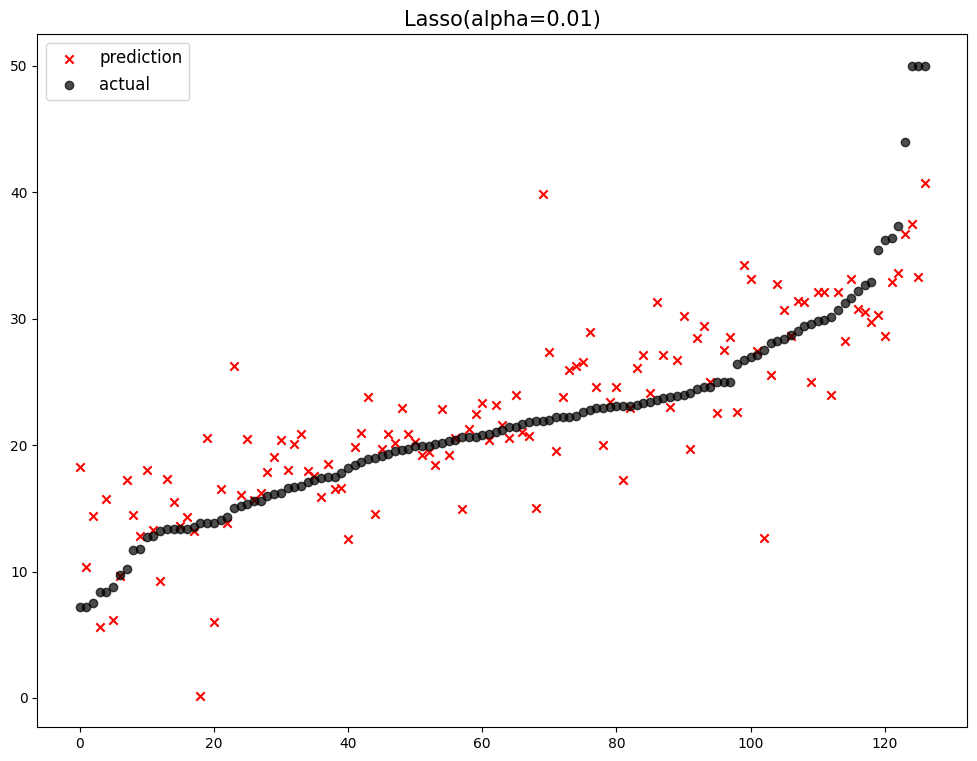

               model        mse
0   Lasso(alpha=100)  47.982772
1    Lasso(alpha=10)  27.183237
2   LinearRegression  23.658372
3  Lasso(alpha=0.01)  23.450759
4   Lasso(alpha=0.1)  22.973392
5     Lasso(alpha=1)  21.065893


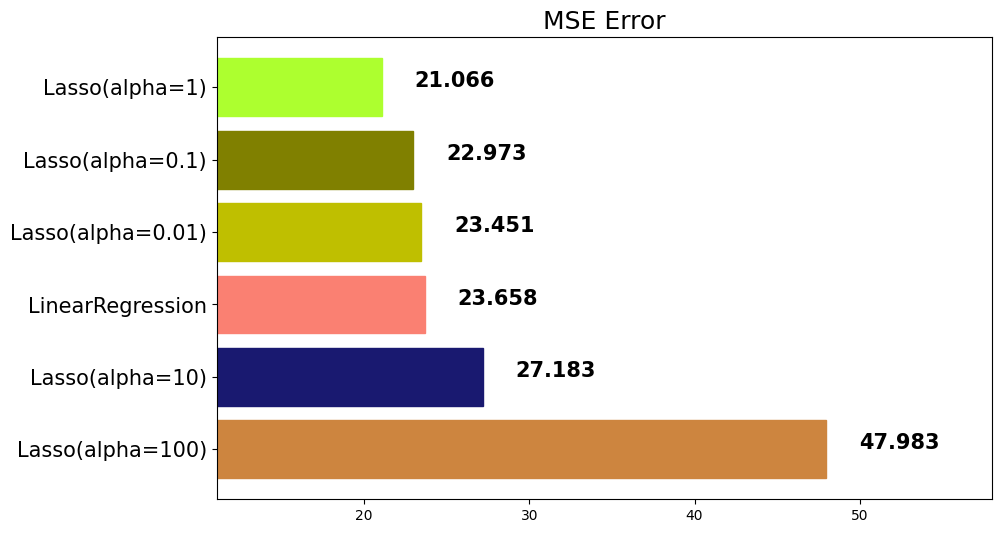

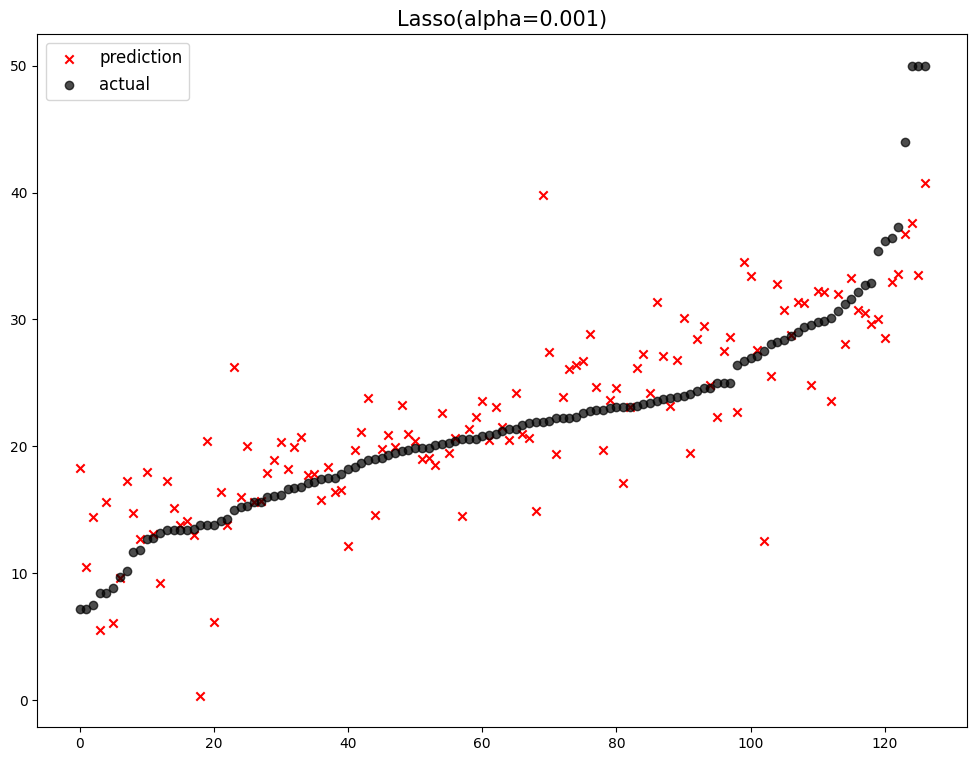

                model        mse
0    Lasso(alpha=100)  47.982772
1     Lasso(alpha=10)  27.183237
2    LinearRegression  23.658372
3  Lasso(alpha=0.001)  23.634809
4   Lasso(alpha=0.01)  23.450759
5    Lasso(alpha=0.1)  22.973392
6      Lasso(alpha=1)  21.065893


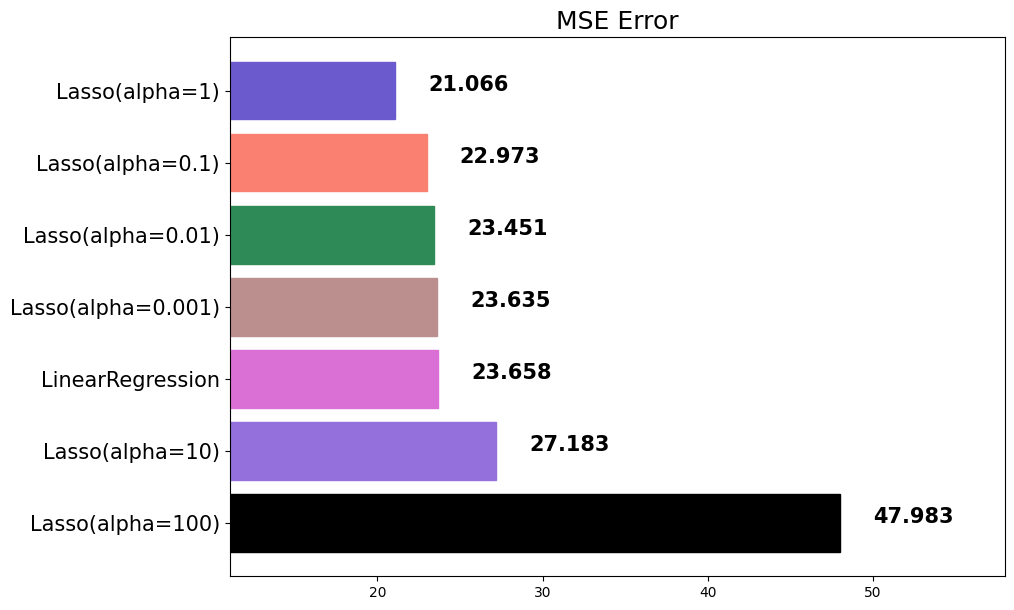

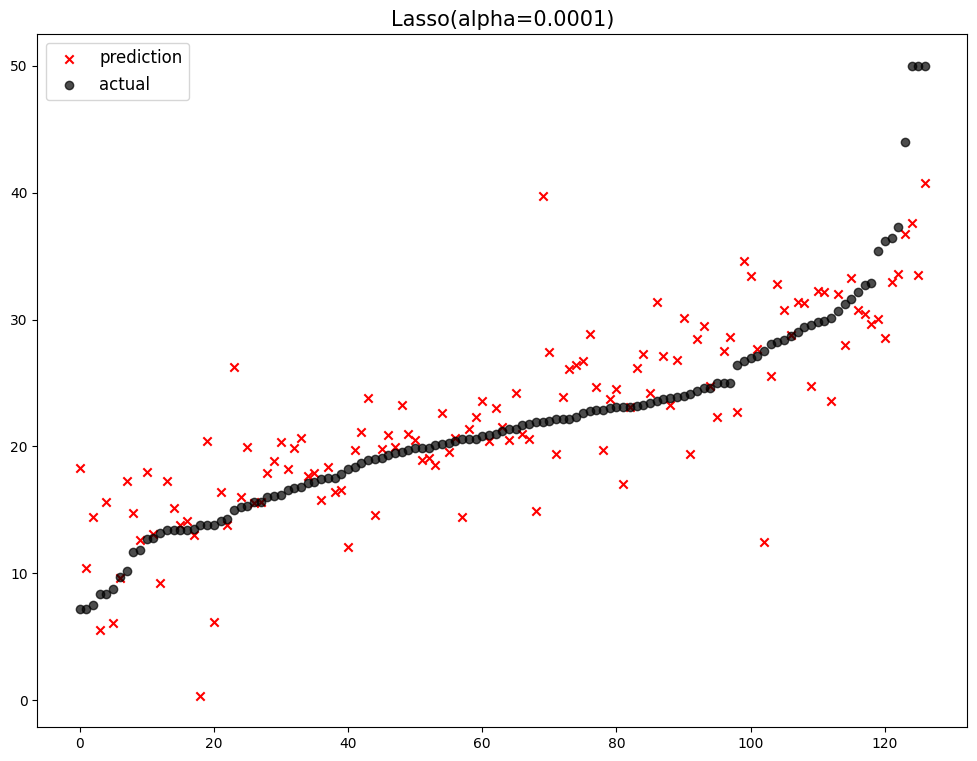

                 model        mse
0     Lasso(alpha=100)  47.982772
1      Lasso(alpha=10)  27.183237
2     LinearRegression  23.658372
3  Lasso(alpha=0.0001)  23.655983
4   Lasso(alpha=0.001)  23.634809
5    Lasso(alpha=0.01)  23.450759
6     Lasso(alpha=0.1)  22.973392
7       Lasso(alpha=1)  21.065893


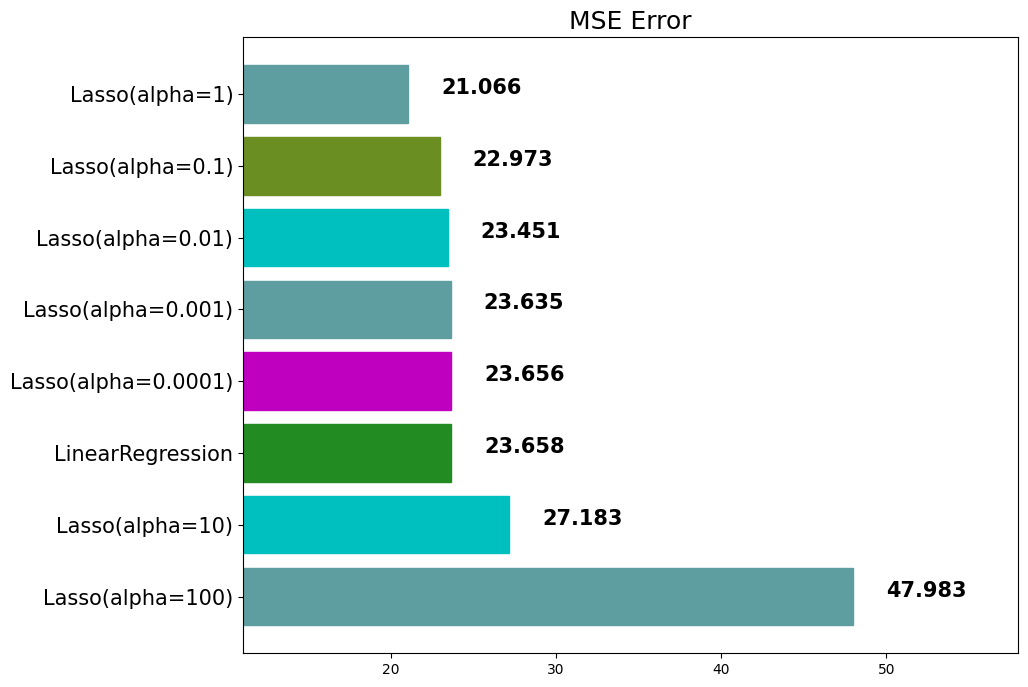

In [54]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [55]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

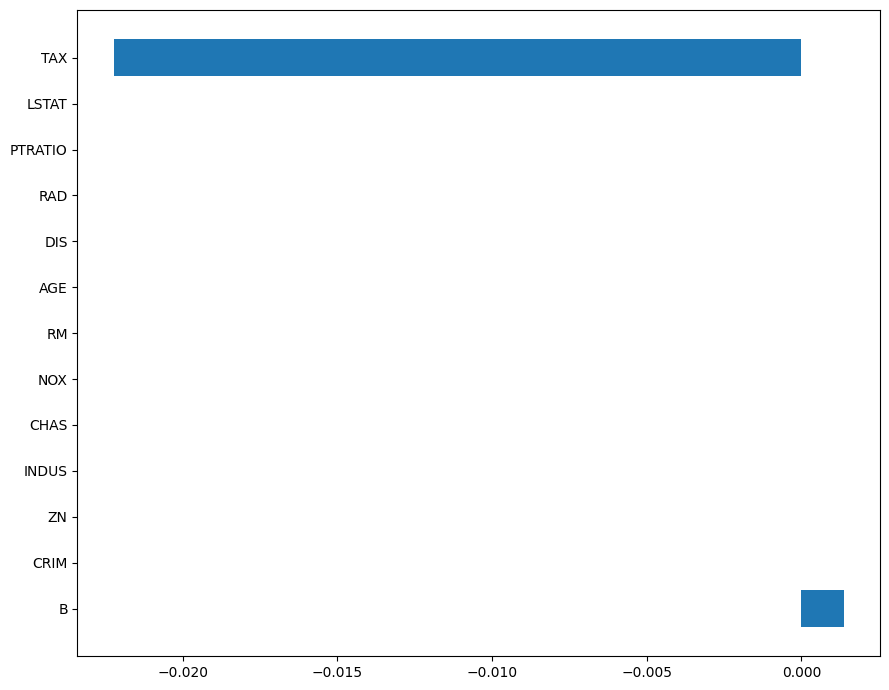

In [56]:
plot_coef(x_train.columns, lasso_100.coef_)

In [57]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.0222191 ,
       -0.        ,  0.00136049, -0.        ])

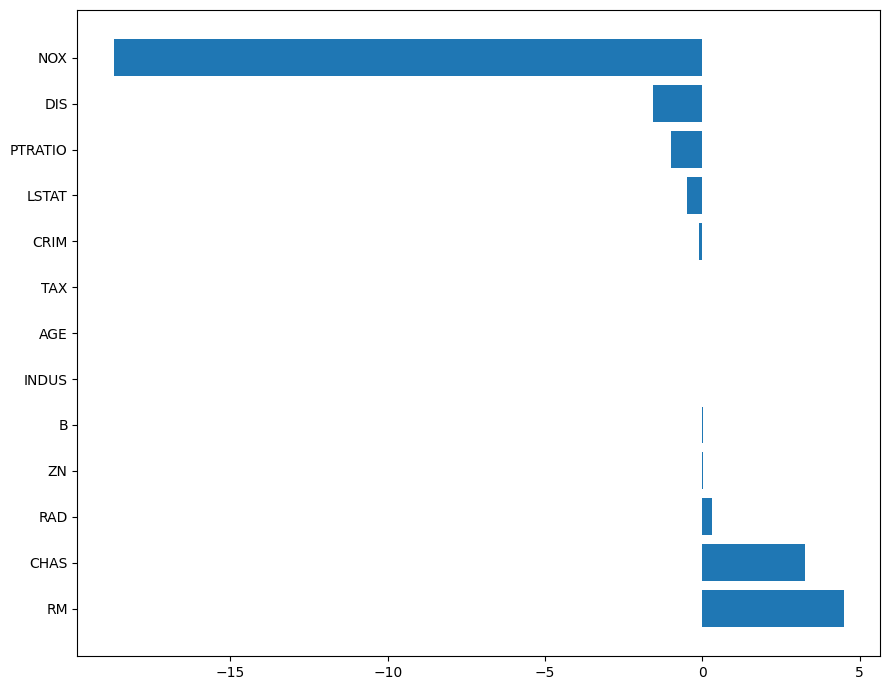

In [58]:
plot_coef(x_train.columns, lasso_001.coef_)

In [59]:
lasso_001.coef_

array([ -0.11393198,   0.02745881,   0.00283315,   3.25832262,
       -18.70441708,   4.4911505 ,  -0.00210043,  -1.56689644,
         0.30634475,  -0.01163606,  -1.0028911 ,   0.00903961,
        -0.49289248])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용).
 * l1_ratio = 1 (L1 규제만 사용).
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
ratios = [0.2, 0.5, 0.8]

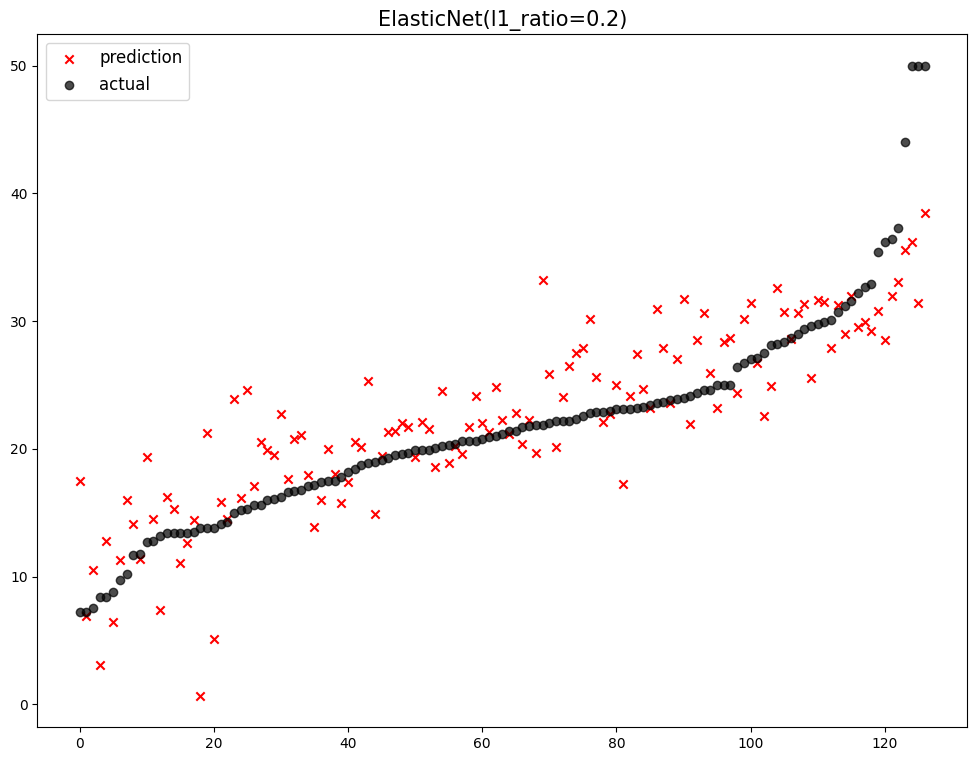

                      model        mse
0          Lasso(alpha=100)  47.982772
1           Lasso(alpha=10)  27.183237
2          LinearRegression  23.658372
3       Lasso(alpha=0.0001)  23.655983
4        Lasso(alpha=0.001)  23.634809
5         Lasso(alpha=0.01)  23.450759
6          Lasso(alpha=0.1)  22.973392
7  ElasticNet(l1_ratio=0.2)  21.164107
8            Lasso(alpha=1)  21.065893


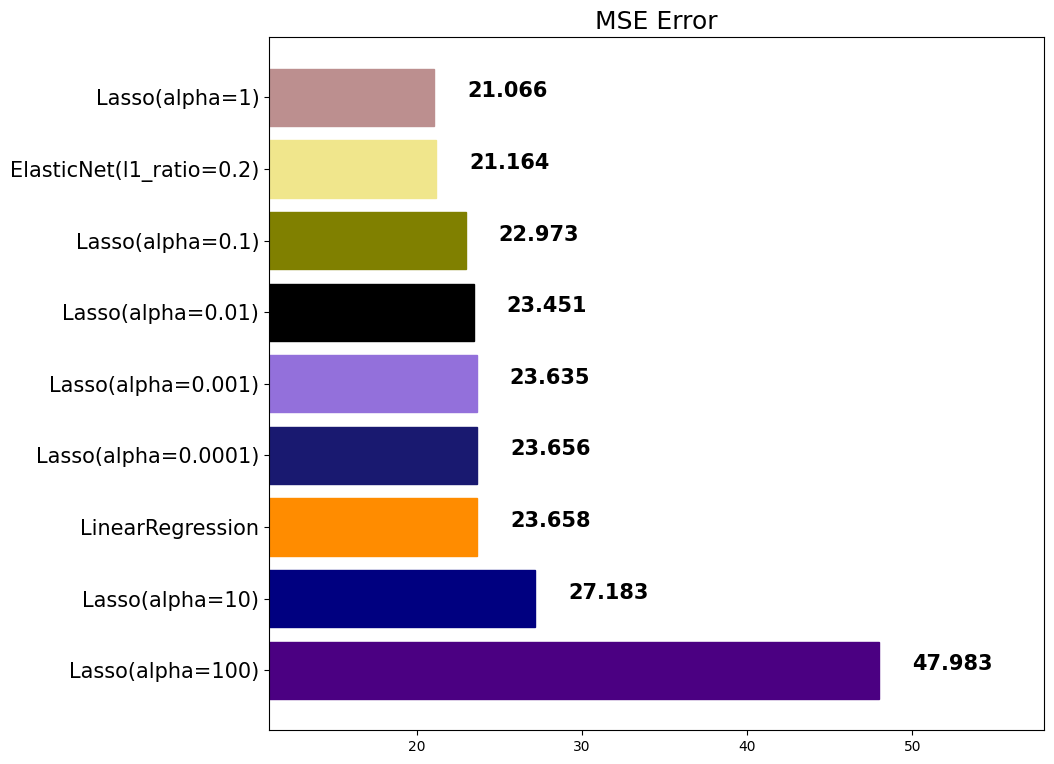

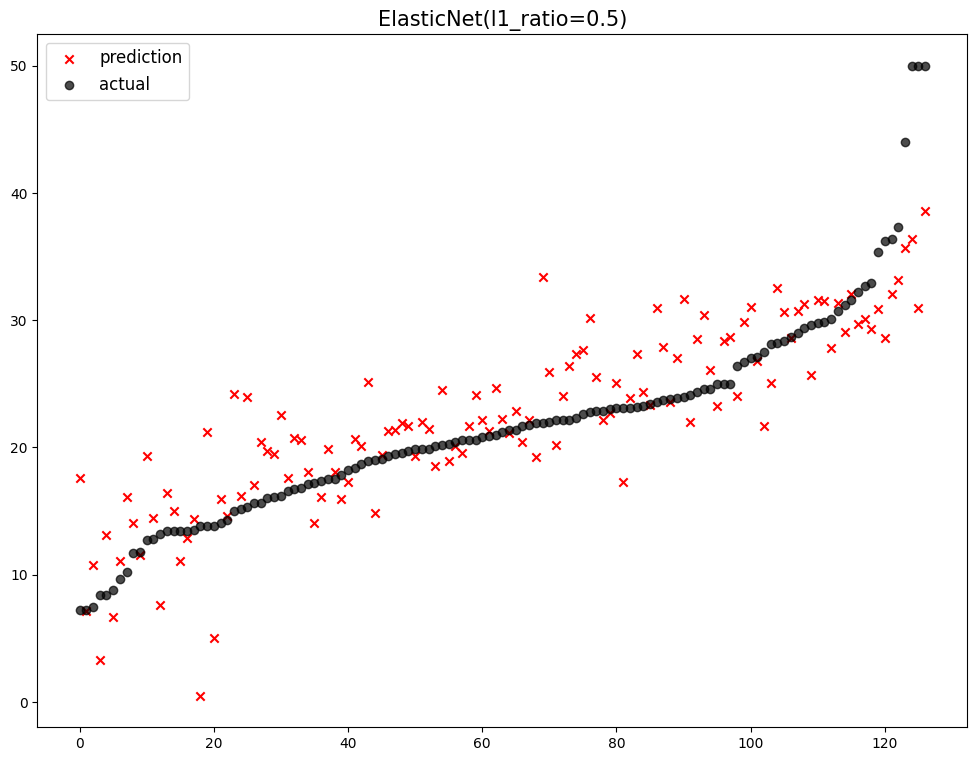

                      model        mse
0          Lasso(alpha=100)  47.982772
1           Lasso(alpha=10)  27.183237
2          LinearRegression  23.658372
3       Lasso(alpha=0.0001)  23.655983
4        Lasso(alpha=0.001)  23.634809
5         Lasso(alpha=0.01)  23.450759
6          Lasso(alpha=0.1)  22.973392
7  ElasticNet(l1_ratio=0.2)  21.164107
8            Lasso(alpha=1)  21.065893
9  ElasticNet(l1_ratio=0.5)  21.021912


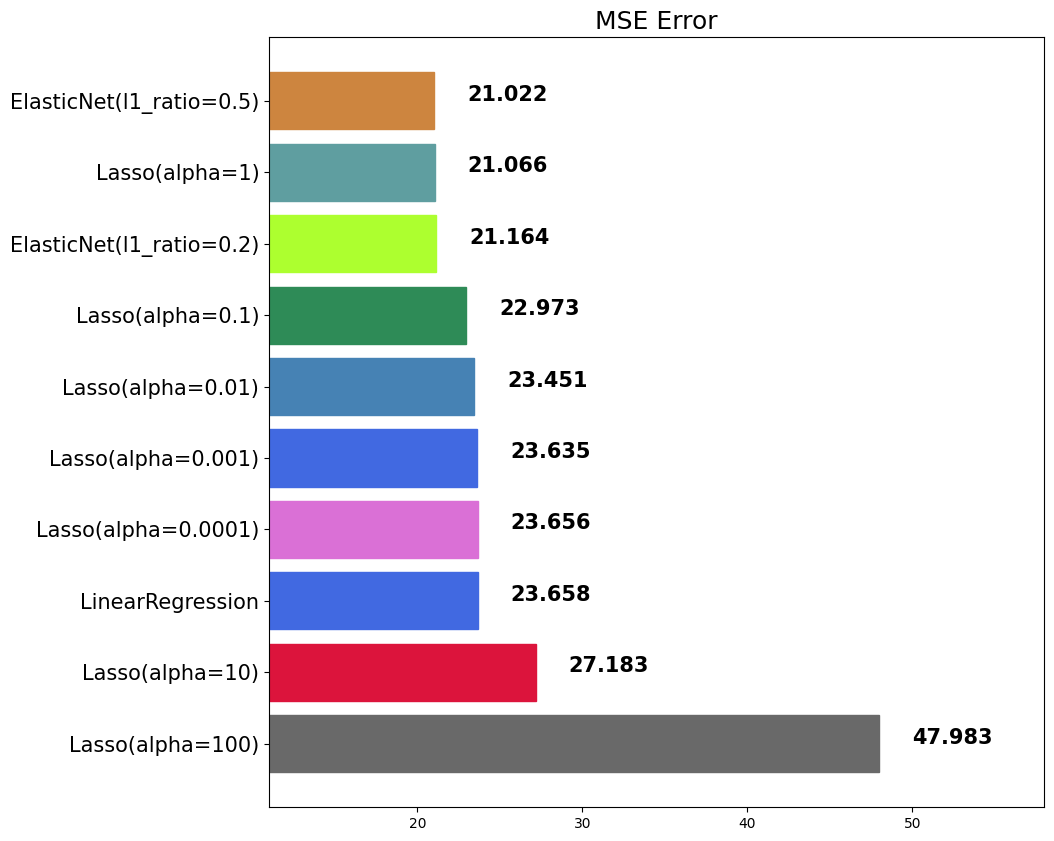

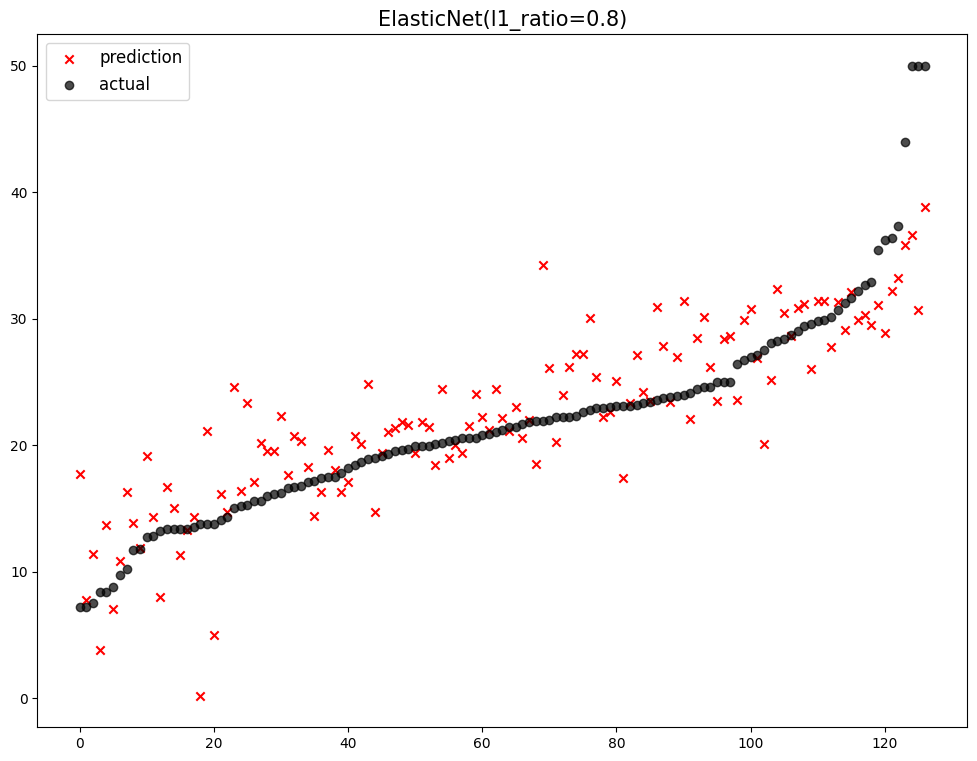

                       model        mse
0           Lasso(alpha=100)  47.982772
1            Lasso(alpha=10)  27.183237
2           LinearRegression  23.658372
3        Lasso(alpha=0.0001)  23.655983
4         Lasso(alpha=0.001)  23.634809
5          Lasso(alpha=0.01)  23.450759
6           Lasso(alpha=0.1)  22.973392
7   ElasticNet(l1_ratio=0.2)  21.164107
8             Lasso(alpha=1)  21.065893
9   ElasticNet(l1_ratio=0.5)  21.021912
10  ElasticNet(l1_ratio=0.8)  20.959626


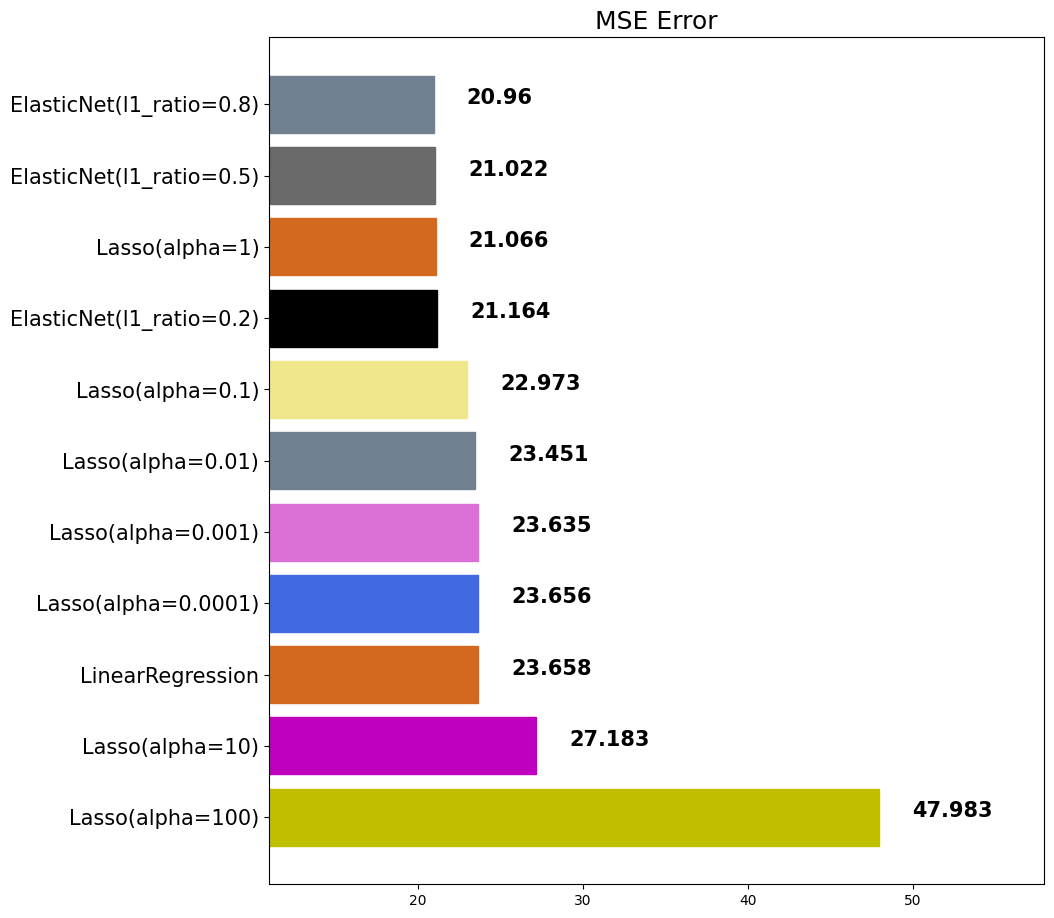

In [62]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [63]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

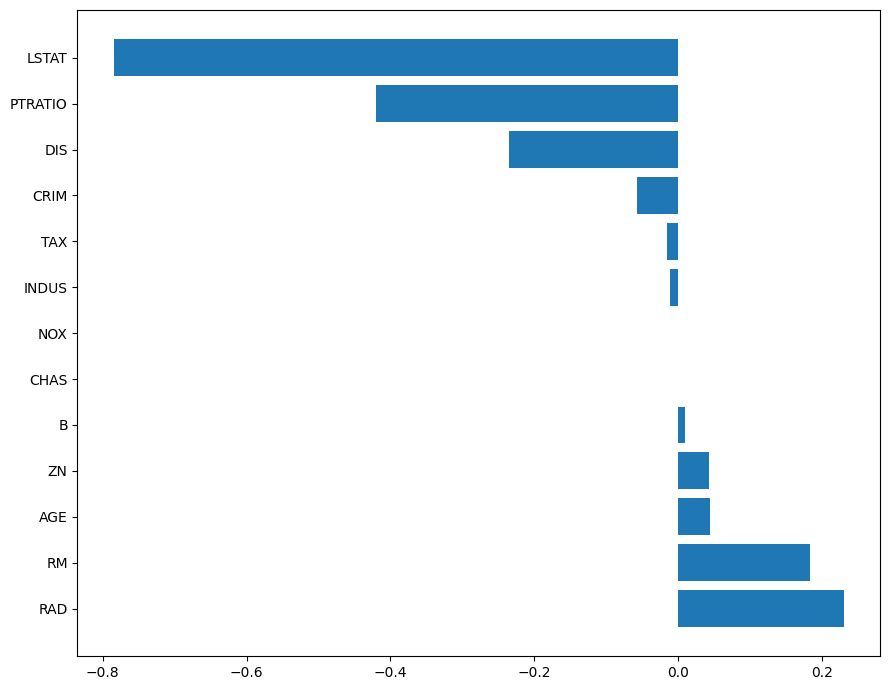

In [64]:
plot_coef(x_train.columns, elsticnet_20.coef_)

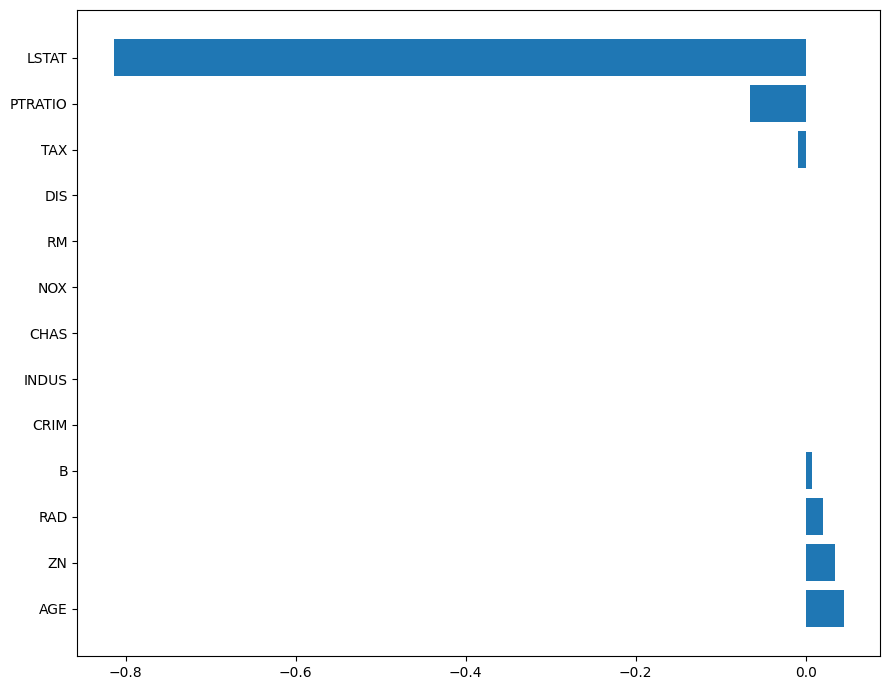

In [65]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [66]:
elsticnet_80.coef_

array([-0.        ,  0.03452067, -0.        ,  0.        ,  0.        ,
        0.        ,  0.04460974, -0.        ,  0.0204623 , -0.00875415,
       -0.06493746,  0.00738946, -0.81365239])

## Scaler

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [68]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.602184,10.821900,11.148153,0.071240,0.553685,6.288697,69.048285,3.746769,9.110818,400.997361,18.391557,360.904697,12.685092
std,8.833008,22.648524,6.933977,0.257566,0.114755,0.717875,28.487668,2.009651,8.505732,166.968211,2.220487,81.633923,7.154669
min,0.010960,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,188.000000,12.600000,2.600000,1.920000
25%,0.083785,0.000000,5.190000,0.000000,0.451000,5.877000,42.500000,2.102150,4.000000,277.000000,17.400000,375.695000,6.915000
50%,0.268380,0.000000,8.560000,0.000000,0.532000,6.182000,78.300000,3.272100,5.000000,329.000000,18.900000,391.130000,11.280000
75%,2.684725,12.500000,18.100000,0.000000,0.624000,6.621500,95.100000,5.116700,8.000000,666.000000,20.200000,395.720000,17.115000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [69]:
std_scaler = StandardScaler()

In [70]:
std_scaled = std_scaler.fit_transform(x_train)

In [71]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.48,-1.50,-0.28,-1.47,-3.38,-2.33,-1.30,-0.95,-1.28,-2.61,-4.39,-1.51
25%,-0.40,-0.48,-0.86,-0.28,-0.90,-0.57,-0.93,-0.82,-0.60,-0.74,-0.45,0.18,-0.81
50%,-0.38,-0.48,-0.37,-0.28,-0.19,-0.15,0.33,-0.24,-0.48,-0.43,0.23,0.37,-0.20
75%,-0.10,0.07,1.00,-0.28,0.61,0.46,0.92,0.68,-0.13,1.59,0.82,0.43,0.62
max,9.68,3.94,2.40,3.61,2.77,3.40,1.09,3.47,1.75,1.86,1.27,0.44,3.40


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [72]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [73]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.11,0.39,0.07,0.35,0.50,0.68,0.27,0.35,0.41,0.67,0.91,0.31
std,0.10,0.23,0.26,0.26,0.24,0.15,0.29,0.21,0.37,0.32,0.26,0.21,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.16,0.00,0.14,0.41,0.41,0.10,0.13,0.17,0.56,0.95,0.14
50%,0.00,0.00,0.29,0.00,0.30,0.48,0.78,0.22,0.17,0.27,0.73,0.99,0.27
75%,0.03,0.12,0.64,0.00,0.49,0.57,0.95,0.42,0.30,0.91,0.88,1.00,0.43
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [74]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [75]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [76]:
from sklearn.pipeline import make_pipeline

In [77]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [78]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

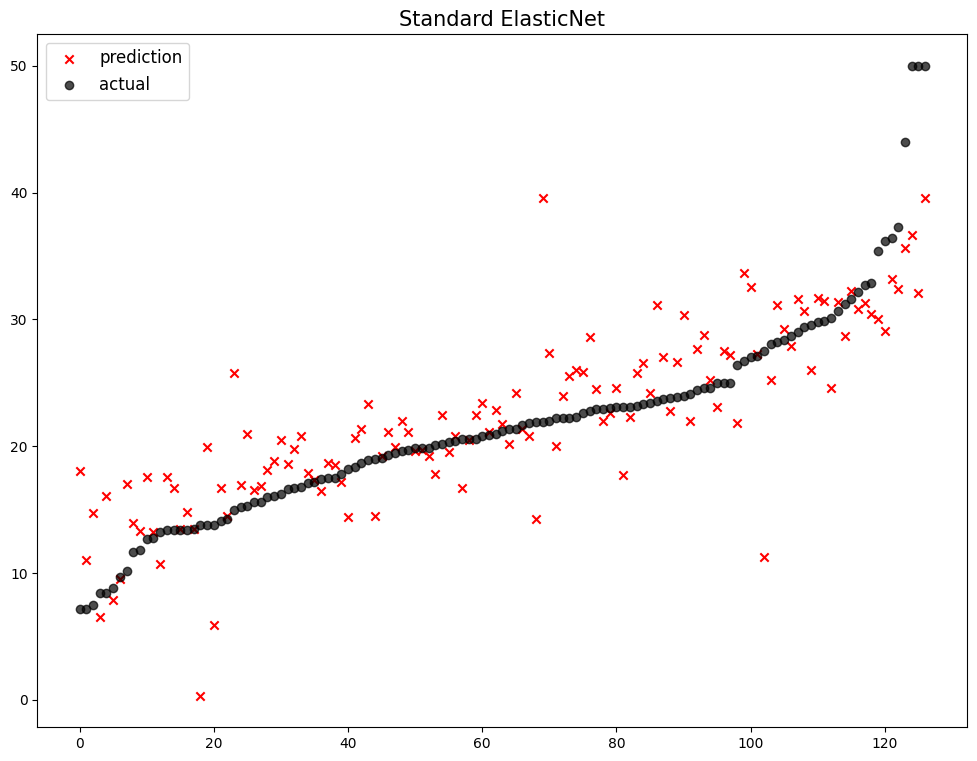

                       model        mse
0           Lasso(alpha=100)  47.982772
1            Lasso(alpha=10)  27.183237
2           LinearRegression  23.658372
3        Lasso(alpha=0.0001)  23.655983
4         Lasso(alpha=0.001)  23.634809
5          Lasso(alpha=0.01)  23.450759
6        Standard ElasticNet  23.154286
7           Lasso(alpha=0.1)  22.973392
8   ElasticNet(l1_ratio=0.2)  21.164107
9             Lasso(alpha=1)  21.065893
10  ElasticNet(l1_ratio=0.5)  21.021912
11  ElasticNet(l1_ratio=0.8)  20.959626


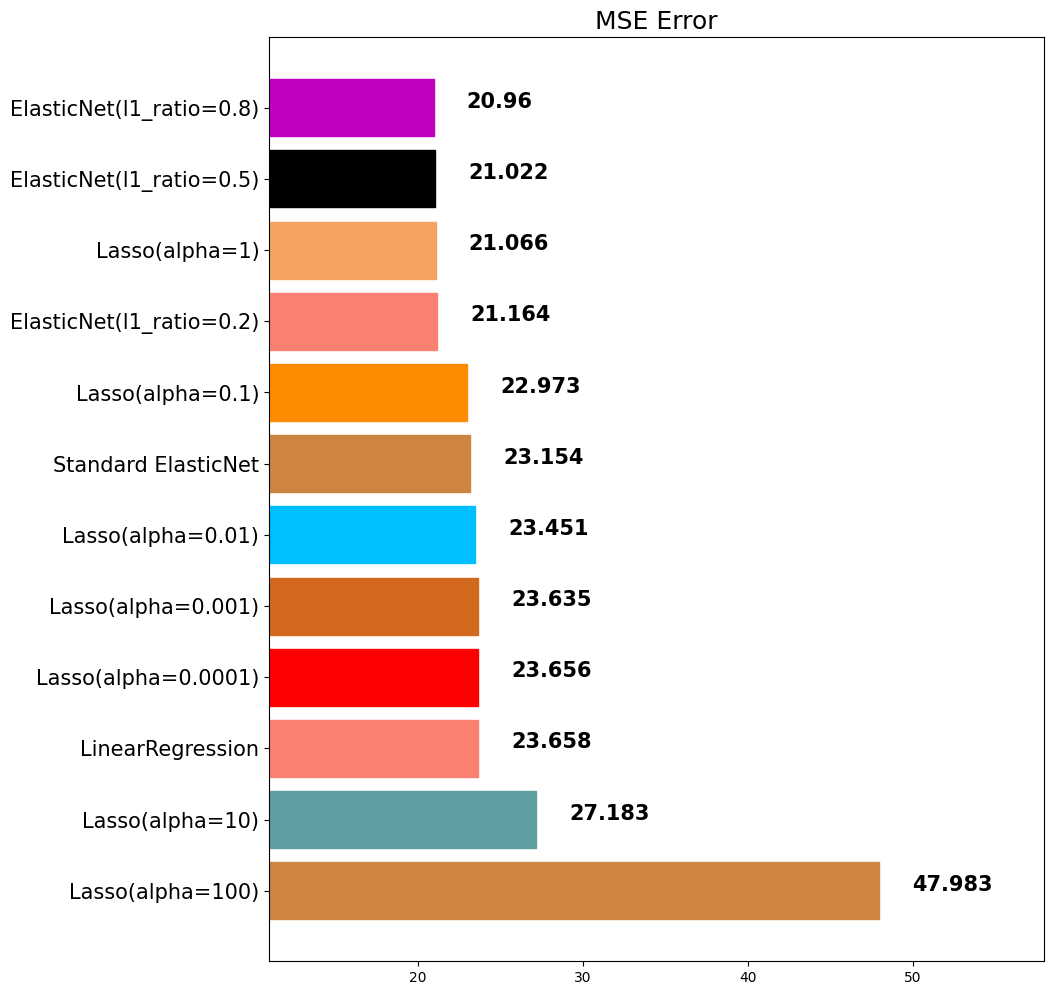

In [79]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

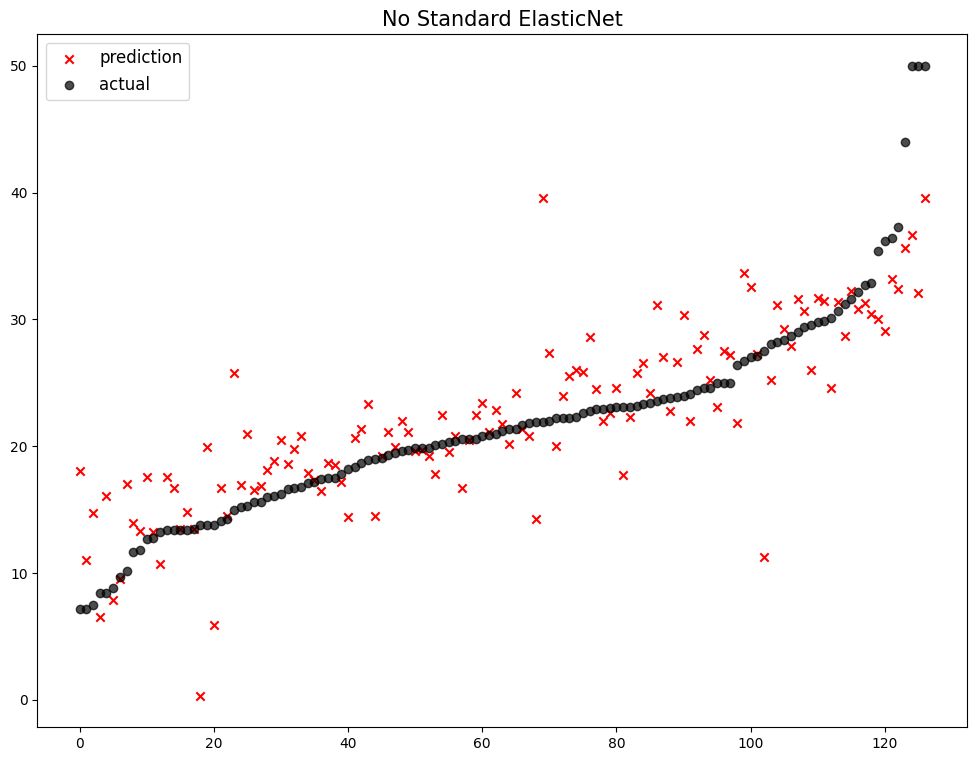

                       model        mse
0           Lasso(alpha=100)  47.982772
1            Lasso(alpha=10)  27.183237
2           LinearRegression  23.658372
3        Lasso(alpha=0.0001)  23.655983
4         Lasso(alpha=0.001)  23.634809
5          Lasso(alpha=0.01)  23.450759
6        Standard ElasticNet  23.154286
7     No Standard ElasticNet  23.154286
8           Lasso(alpha=0.1)  22.973392
9   ElasticNet(l1_ratio=0.2)  21.164107
10            Lasso(alpha=1)  21.065893
11  ElasticNet(l1_ratio=0.5)  21.021912
12  ElasticNet(l1_ratio=0.8)  20.959626


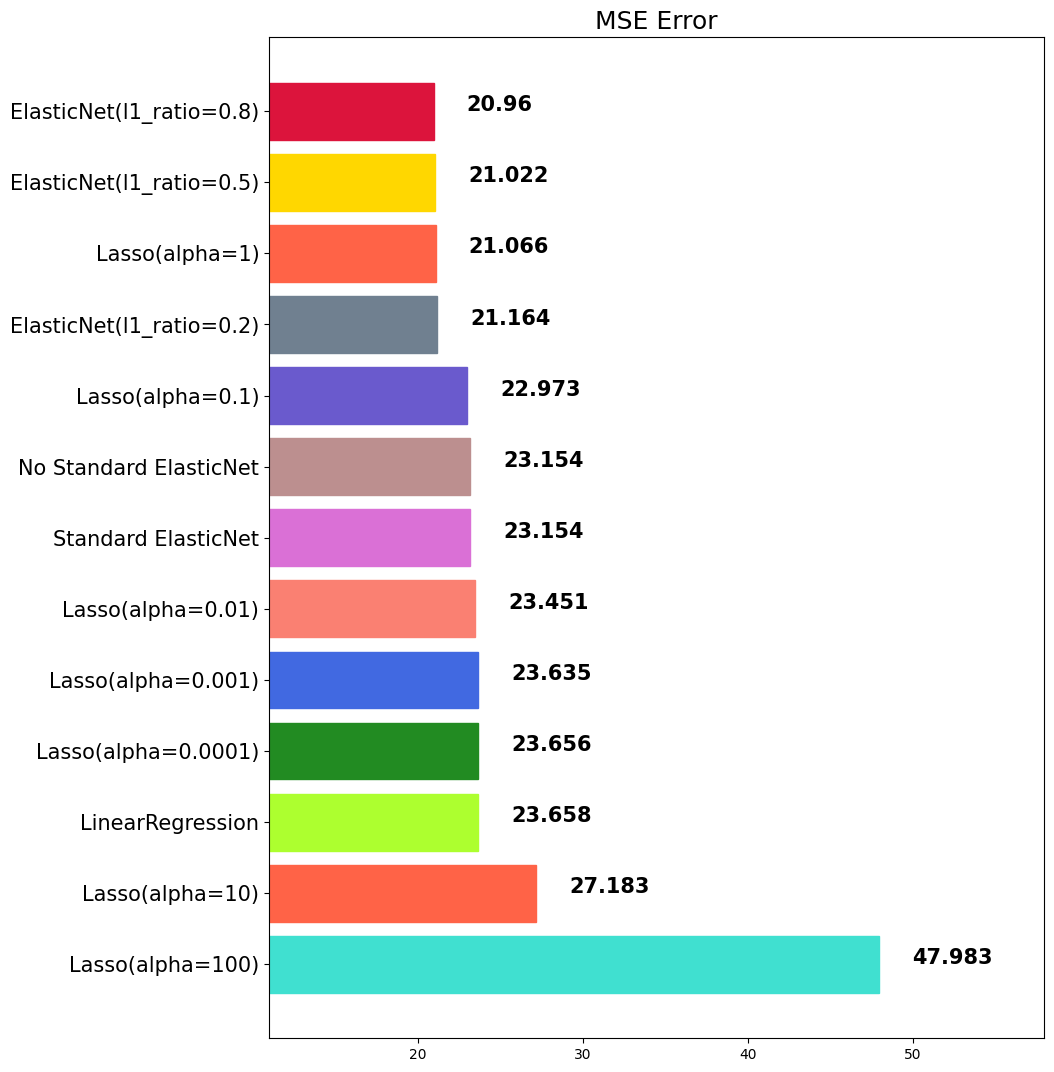

In [80]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [83]:
poly_features = poly.fit_transform(x_train)[0]

In [84]:
poly_features

array([     0.04203   ,     28.        ,     15.04      ,      0.        ,
            0.464     ,      6.442     ,     53.6       ,      3.6659    ,
            4.        ,    270.        ,     18.2       ,    395.01      ,
            8.16      ,      0.00176652,      1.17684   ,      0.6321312 ,
            0.        ,      0.01950192,      0.27075726,      2.252808  ,
            0.15407778,      0.16812   ,     11.3481    ,      0.764946  ,
           16.6022703 ,      0.3429648 ,    784.        ,    421.12      ,
            0.        ,     12.992     ,    180.376     ,   1500.8       ,
          102.6452    ,    112.        ,   7560.        ,    509.6       ,
        11060.28      ,    228.48      ,    226.2016    ,      0.        ,
            6.97856   ,     96.88768   ,    806.144     ,     55.135136  ,
           60.16      ,   4060.8       ,    273.728     ,   5940.9504    ,
          122.7264    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [85]:
x_train.iloc[0]

CRIM         0.04203
ZN          28.00000
INDUS       15.04000
CHAS         0.00000
NOX          0.46400
RM           6.44200
AGE         53.60000
DIS          3.66590
RAD          4.00000
TAX        270.00000
PTRATIO     18.20000
B          395.01000
LSTAT        8.16000
Name: 92, dtype: float64

In [86]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [87]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.743e+01, tolerance: 3.437e+00
  model = cd_fast.enet_coordinate_descent(


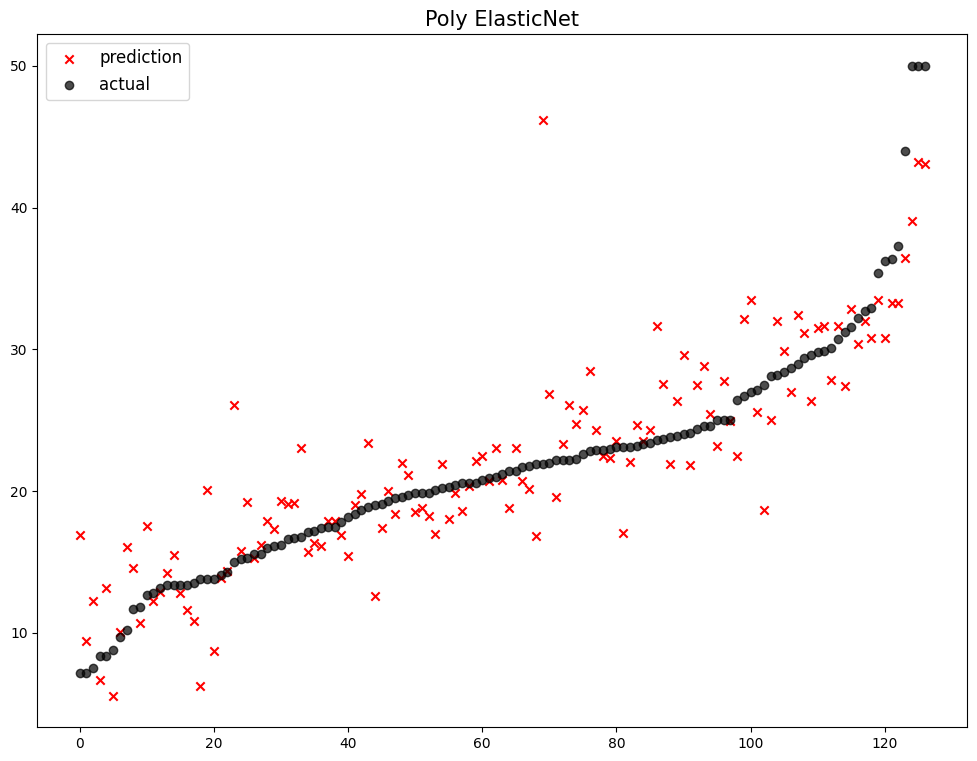

                       model        mse
0           Lasso(alpha=100)  47.982772
1            Lasso(alpha=10)  27.183237
2           LinearRegression  23.658372
3        Lasso(alpha=0.0001)  23.655983
4         Lasso(alpha=0.001)  23.634809
5          Lasso(alpha=0.01)  23.450759
6        Standard ElasticNet  23.154286
7     No Standard ElasticNet  23.154286
8           Lasso(alpha=0.1)  22.973392
9   ElasticNet(l1_ratio=0.2)  21.164107
10            Lasso(alpha=1)  21.065893
11  ElasticNet(l1_ratio=0.5)  21.021912
12  ElasticNet(l1_ratio=0.8)  20.959626
13           Poly ElasticNet  17.423214


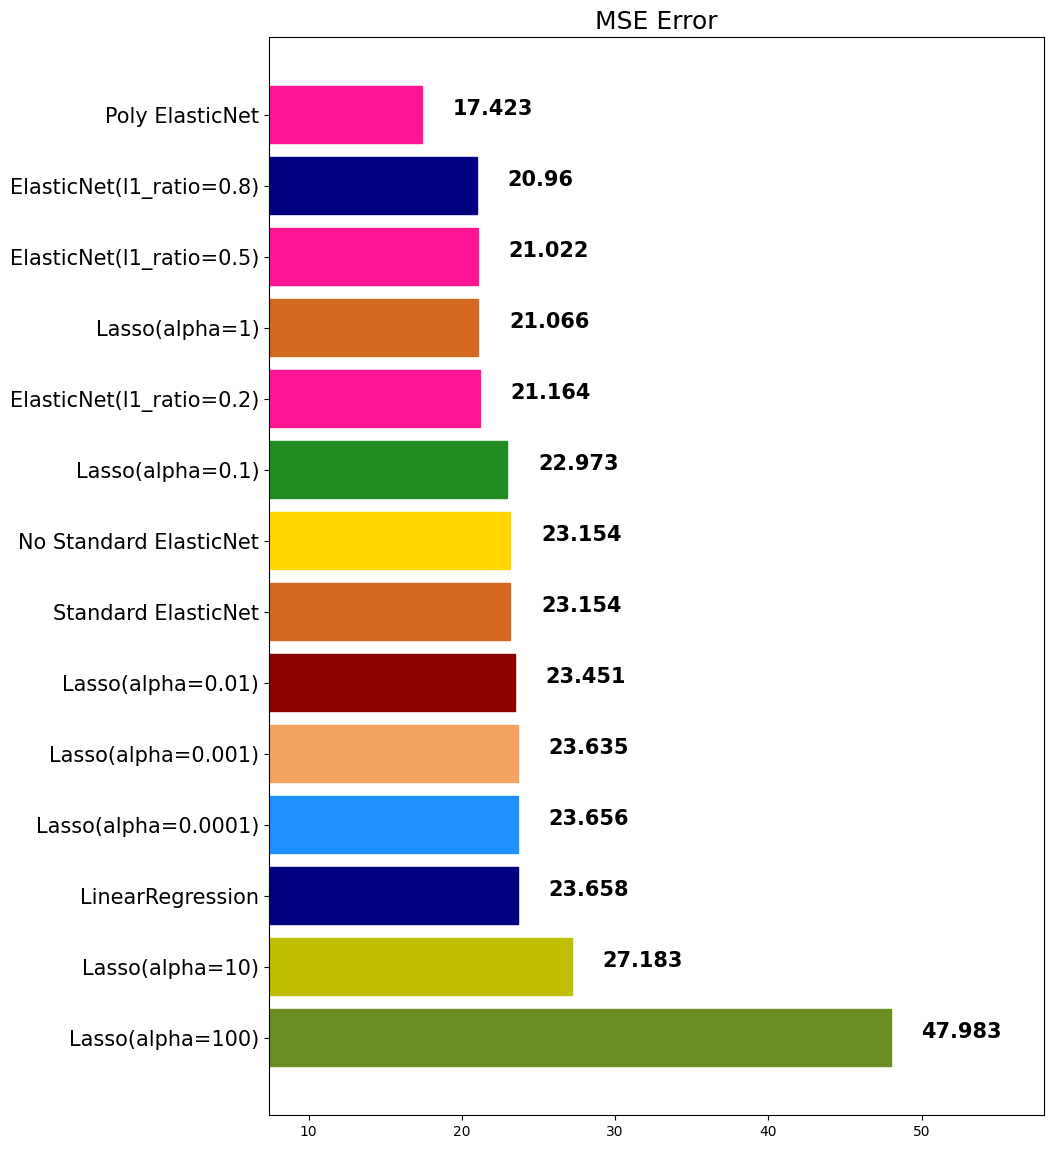

In [88]:
mse_eval('Poly ElasticNet', poly_pred, y_test)